In [1]:
import numpy as np
import scipy
from scipy.integrate import odeint
from scipy.optimize import minimize
import pickle
from timeit import default_timer as timer
import sys, getopt
import time
import csv
import multiprocessing as mp
from multiprocessing import Pool
import os
import pandas as pd
from scipy.optimize import Bounds


### Import parameters for simulations

In [2]:
from two_pop_params_current import *
from init_cond_current import y0_use

### Import model, objective functions to minimize, and functions to display results

In [3]:
from coronavirusEqs import *
from deaths_combo0 import *
from ineq_measures_alone import *
from plotting_fn import *

In [4]:
#ref_dirs_10k_10p = np.zeros((10000,8))
#for i in range(10000):
#    it = 0
#    test=np.random.rand(8)
#    while (test[0:4]@y0_use[1:5]+test[4:]@y0_use[6:10])>0.1*N:
#        test=np.random.rand(8)
#    ref_dirs_10k_10p[i,:]=test
#np.savetxt('ref_dirs_10k_10p.txt', ref_dirs_10k_10p)
ref_dirs_10k_10p=np.loadtxt('ref_dirs_10k_10p.txt')

In [5]:
def check_constraint(p,pops):
    return (p[0:4]@pops[1:5]+p[4:]@pops[6:10])<0.1*N

# 10 % Cost Constraint (combo)



## Get starting points

In [7]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_death_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_d10_01 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,1,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_d10_01 = np.append(starting_points_d10_01,sp_1).reshape(21,8)
starting_points_d10_01 = np.append(starting_points_d10_01,sp_2).reshape(22,8)
starting_points_d10_01 = np.append(starting_points_d10_01,sp_3).reshape(23,8)
starting_points_d10_01 = np.append(starting_points_d10_01,sp_4).reshape(24,8)
np.savetxt('starting_points_10p_combo0_death.txt', starting_points_d10_01)

In [8]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_ineq_bars_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_d10_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,1,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_d10_10 = np.append(starting_points_d10_10,sp_1).reshape(21,8)
starting_points_d10_10 = np.append(starting_points_d10_10,sp_2).reshape(22,8)
starting_points_d10_10 = np.append(starting_points_d10_10,sp_3).reshape(23,8)
starting_points_d10_10 = np.append(starting_points_d10_10,sp_4).reshape(24,8)
#np.savetxt('starting_points_10p_combo0_ineq_bars.txt', starting_points_d10_10)

In [9]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_ineq_mort_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_d10_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,1,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_d10_10 = np.append(starting_points_d10_10,sp_1).reshape(21,8)
starting_points_d10_10 = np.append(starting_points_d10_10,sp_2).reshape(22,8)
starting_points_d10_10 = np.append(starting_points_d10_10,sp_3).reshape(23,8)
starting_points_d10_10 = np.append(starting_points_d10_10,sp_4).reshape(24,8)
np.savetxt('starting_points_10p_combo0_ineq_mort.txt', starting_points_d10_10)

In [10]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_ineq_mort_IDIS_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_ineq_mi_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,1,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_ineq_mi_10 = np.append(starting_points_ineq_mi_10,sp_1).reshape(21,8)
starting_points_ineq_mi_10 = np.append(starting_points_ineq_mi_10,sp_2).reshape(22,8)
starting_points_ineq_mi_10 = np.append(starting_points_ineq_mi_10,sp_3).reshape(23,8)
starting_points_ineq_mi_10 = np.append(starting_points_ineq_mi_10,sp_4).reshape(24,8)
np.savetxt('starting_points_10p_combo0_ineq_mi.txt', starting_points_ineq_mi_10)

In [11]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_both_bars_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_bb_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0.,   0.,   0.02, 0.36, 0.,   0.53, 0.28, 0.37])
sp_2 = np.array([0,0,0,0.7,0,0,1,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_bb_10 = np.append(starting_points_bb_10,sp_2).reshape(21,8)
starting_points_bb_10 = np.append(starting_points_bb_10,sp_3).reshape(22,8)
starting_points_bb_10 = np.append(starting_points_bb_10,sp_4).reshape(23,8)
starting_points_bb_10 = np.append(starting_points_bb_10,sp_1).reshape(24,8)
np.savetxt('starting_points_10p_combo0_bb.txt', starting_points_bb_10)

In [12]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_both_mort_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_bm_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0.,   0.,   0.02, 0.36, 0.,   0.53, 0.28, 0.37])
sp_2 = np.array([0,0,0,0.7,0,0,1,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_bm_10 = np.append(starting_points_bm_10,sp_2).reshape(21,8)
starting_points_bm_10 = np.append(starting_points_bm_10,sp_3).reshape(22,8)
starting_points_bm_10 = np.append(starting_points_bm_10,sp_4).reshape(23,8)
starting_points_bm_10 = np.append(starting_points_bm_10,sp_1).reshape(24,8)
np.savetxt('starting_points_10p_combo0_bm.txt', starting_points_bm_10)

In [13]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_both_mort_IDIS_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_bi_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0.,   0.,   0.02, 0.36, 0.,   0.53, 0.28, 0.37])
sp_2 = np.array([0,0,0,0.7,0,0,1,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_bi_10 = np.append(starting_points_bi_10,sp_2).reshape(21,8)
starting_points_bi_10 = np.append(starting_points_bi_10,sp_3).reshape(22,8)
starting_points_bi_10 = np.append(starting_points_bi_10,sp_4).reshape(23,8)
starting_points_bi_10 = np.append(starting_points_bi_10,sp_1).reshape(24,8)
np.savetxt('starting_points_10p_combo0_bi.txt', starting_points_bi_10)

In [18]:
starting_points_deaths_10  = np.loadtxt('starting_points_10p_combo0_death.txt')
starting_points_ineq_bars_10 =np.loadtxt('starting_points_10p_combo0_ineq_bars.txt')
starting_points_ineq_mort_10  = np.loadtxt('starting_points_10p_combo0_ineq_mort.txt')
starting_points_ineq_mi_10 = np.loadtxt('starting_points_10p_combo0_ineq_mi.txt')
starting_points_bb_10 = np.loadtxt('starting_points_10p_combo0_bb.txt')
starting_points_bm_10 = np.loadtxt('starting_points_10p_combo0_bm.txt')
starting_points_bi_10=np.loadtxt('starting_points_10p_combo0_bi.txt')

In [15]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_death_10,[d for d in starting_points_d10_01])#starting_points_deaths_10])
out01 = np.array(output)

print(np.round(out01[np.argmin(out01[:,1]),:][0],2))
np.savetxt('worker_death_10_sol.txt', out01[np.argmin(out01[:,1]),:][0])

[0.  0.  0.  0.7 0.  0.  1.  1. ]


Total deaths: 152.0
Deaths: [2.88190098e-01 2.80648815e+00 1.24328767e+01 5.83109121e+01
 5.64301912e+01 5.12532725e-01 6.03297194e+00 1.51661307e+01
 8.52287751e-09 3.24955618e-08]
Inequity in deaths (bars): 14.788192381289809
Inequity in deaths (diff): 0.000406249398059024
Inequity in deaths (ID): 426.54153933111286
YLLs: 819.0193381580095
Inequity in YLLs (diff): 647.060743108476
Inequity in YLLs (ID): 431.03705600404044


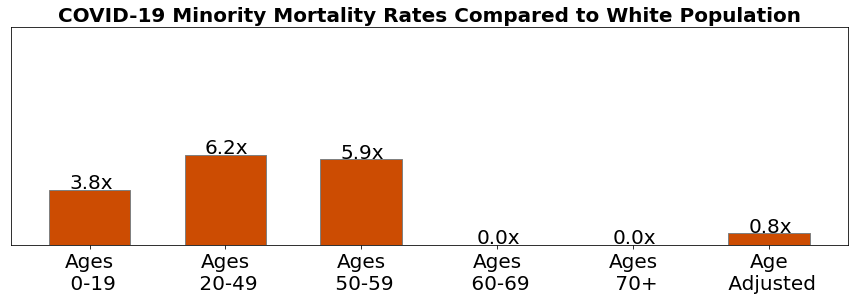

15.013812034271155

In [4]:
sol_d10 = np.loadtxt('worker_death_10_sol.txt')
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_d10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_deaths_10.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))

In [24]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_ineq_bars_10,[d for d in starting_points_ineq_bars_10])
out_ineq_bars_10 = np.array(output)

print(np.round(out_ineq_bars_10[np.argmin(out_ineq_bars_10[:,1]),:][0],2))
np.savetxt('worker_ineq_bars_10_sol.txt', out_ineq_bars_10[np.argmin(out_ineq_bars_10[:,1]),:][0])


[0.   0.   0.   0.   0.68 0.81 0.72 0.51]


Total deaths: 319.0
Deaths: [  0.26699845   2.5102529   11.24917125  57.27934695 217.55256229
   0.46118109   1.61144145   2.33841771   7.02125564  18.73542554]
Inequity in deaths (bars): 3.4915817012065222
Inequity in deaths (diff): 2.8983324551575472e-06
Inequity in deaths (ID): 106.10206954745412
YLLs: 897.8032814070533
Inequity in YLLs (diff): 29.028480420696248
Inequity in YLLs (ID): 111.9247683829542


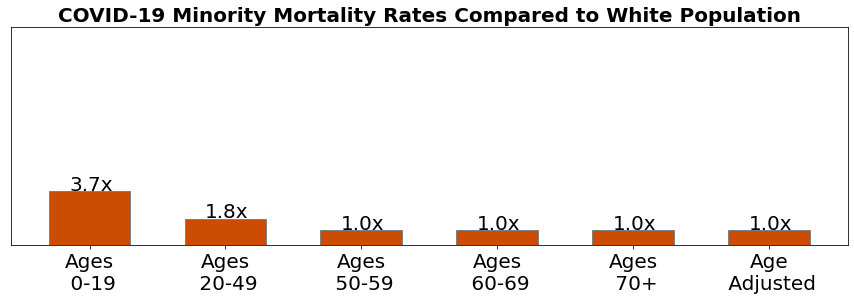

3.5038034467398154

In [88]:
sol_ineq_bars_10=np.loadtxt('worker_ineq_bars_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_ineq_bars_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_rel_ineq_deaths_10.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))

In [30]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_ineq_mort_10,[d for d in starting_points_ineq_mort_10])
out_ineq_mort_10 = np.array(output)

print(np.round(out_ineq_mort_10[np.argmin(out_ineq_mort_10[:,1]),:][0],2))
np.savetxt('worker_ineq_mort_10_sol.txt', out_ineq_mort_10[np.argmin(out_ineq_mort_10[:,1]),:][0])

[0.   0.   0.   0.   0.6  0.81 0.72 0.51]


Total deaths: 323.0
Deaths: [  0.26989617   2.54764846  11.39018639  57.9327303  219.82059419
   0.46728453   2.07681654   2.36819634   7.10122305  18.93073861]
Inequity in deaths (bars): 3.996818533374618
Inequity in deaths (diff): 3.992899624346509e-06
Inequity in deaths (ID): 121.39303861145744
YLLs: 912.6678592497568
Inequity in YLLs (diff): 34.140178696617994
Inequity in YLLs (ID): 127.40317401277821


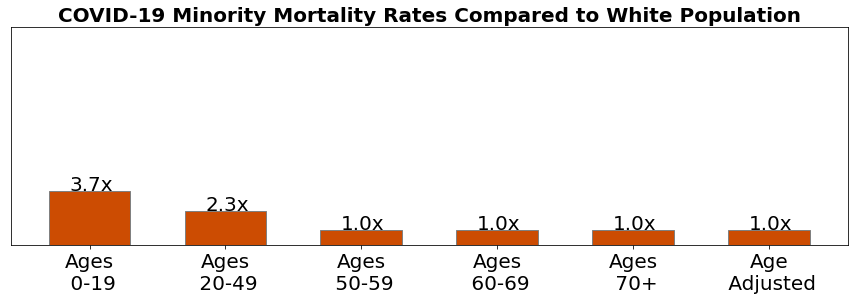

array([3.66074096, 2.33585201, 1.00020785, 0.99998277, 1.00000048,
       1.01758246])

In [89]:
sol_ineq_mort_10=np.loadtxt('worker_ineq_mort_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_ineq_mort_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_abs_ineq_deaths_10.txt', deaths)
plotting_fun2(deaths,total_pops)

In [32]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_ineq_mort_IDIS_10,[d for d in starting_points_ineq_mi_10])
out_ineq_mi_10 = np.array(output)

print(np.round(out_ineq_mi_10[np.argmin(out_ineq_mi_10[:,1]),:][0],2))
np.savetxt('worker_ineq_mi_10_sol.txt', out_ineq_mi_10[np.argmin(out_ineq_mi_10[:,1]),:][0])

[0.   0.   0.   0.   0.68 0.81 0.72 0.51]


Total deaths: 319.0
Deaths: [  0.26699842   2.51025131  11.24916784  57.27931196 217.55204925
   0.46118108   1.61146178   2.33839012   7.02126355  18.73535311]
Inequity in deaths (bars): 3.491596636272326
Inequity in deaths (diff): 2.8981600480394497e-06
Inequity in deaths (ID): 106.10240606121866
YLLs: 897.8016389069571
Inequity in YLLs (diff): 29.027954161920974
Inequity in YLLs (ID): 111.92503659813332


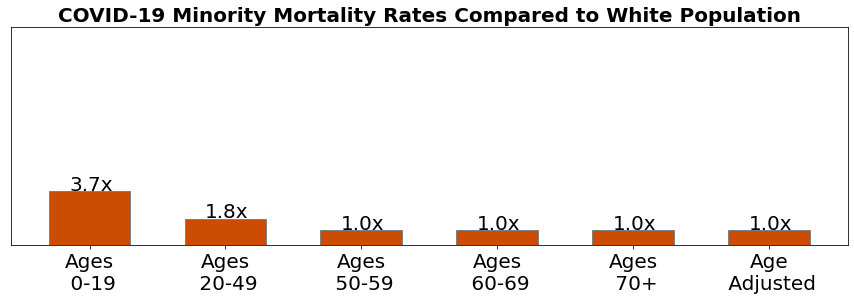

array([3.65213757, 1.83945641, 0.9999999 , 1.00000194, 0.99999939,
       1.01222076])

In [90]:
sol_ineq_mi_10=np.loadtxt('worker_ineq_mi_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_ineq_mi_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_id_ineq_deaths_10.txt', deaths)
   
plotting_fun2(deaths,total_pops)

In [34]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_both_bars_10,[d for d in starting_points_bb_10])
out_bb_10 = np.array(output)

print(np.round(out_bb_10[np.argmin(out_bb_10[:,1]),:][0],2))
np.savetxt('worker_bb_10_sol.txt', out_bb_10[np.argmin(out_bb_10[:,1]),:][0])

[0.   0.   0.   0.6  0.   0.82 0.74 0.82]


In [82]:
sol_bb_10

array([5.96987785e-07, 3.13842323e-06, 1.52393432e-07, 5.98611708e-01,
       4.25881755e-06, 8.16433100e-01, 7.37277718e-01, 8.17137538e-01])

In [81]:
sol_bb_10=np.loadtxt('worker_bb_10_sol.txt')
print(sol_bb_10[0:4]*y0_use[1:5])
print(sol_bb_10[4:]*y0_use[6:10])

[7.05950366e-01 1.27291274e+00 6.84775282e-02 2.66131544e+05]
[1.75175243e+00 6.85035432e+04 4.03591796e+04 3.10811068e+04]


In [84]:
print((2.66131544e+05+3.10811068e+04)/(0.1*N))
print((1.75175243e+00+6.85035432e+04+4.03591796e+04)/(0.1*N))

0.7319075471674882
0.268086605091934


Total deaths: 166.0
Deaths: [ 0.27315378  2.59959832 11.3686566  55.07737575 75.05747101  0.48192046
  5.47673094  2.36322921  6.75134469  6.46387407]
Inequity in deaths (bars): 7.767107402035358
Inequity in deaths (diff): 1.203686885712575e-05
Inequity in deaths (ID): 182.09445810998383
YLLs: 686.9953052927565
Inequity in YLLs (diff): 65.36590599264365
Inequity in YLLs (ID): 188.85118247312002


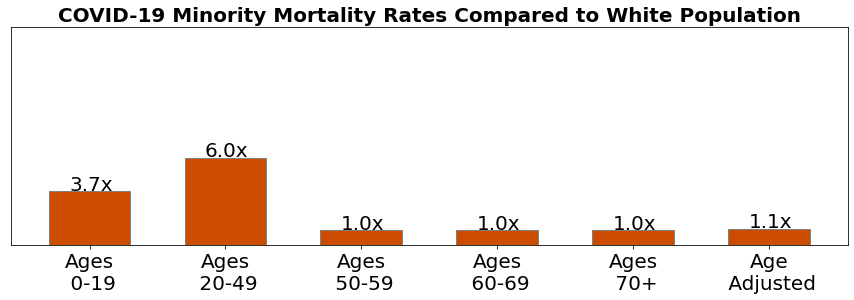

array([3.73037488, 6.03673138, 1.00000019, 1.00000093, 0.99999997,
       1.11653796])

In [91]:
sol_bb_10=np.loadtxt('worker_bb_10_sol.txt')
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_bb_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_rel_both_deaths_10.txt', deaths)
plotting_fun2(deaths,total_pops)

In [36]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_both_mort_10,[d for d in starting_points_bm_10])
out_bm_10 = np.array(output)

print(np.round(out_bm_10[np.argmin(out_bm_10[:,1]),:][0],2))
np.savetxt('worker_bm_10_sol.txt', out_bm_10[np.argmin(out_bm_10[:,1]),:][0])


[0.   0.   0.   0.6  0.   0.82 0.74 0.82]


Total deaths: 166.0
Deaths: [ 0.27315396  2.5996005  11.3686983  55.07730735 75.05698236  0.48192082
  5.47675496  2.36323752  6.75133332  6.46383354]
Inequity in deaths (bars): 7.767128742810034
Inequity in deaths (diff): 1.2036898898157157e-05
Inequity in deaths (ID): 182.09464448719717
YLLs: 686.9947438696197
Inequity in YLLs (diff): 65.36607203040329
Inequity in YLLs (ID): 188.85137395757232


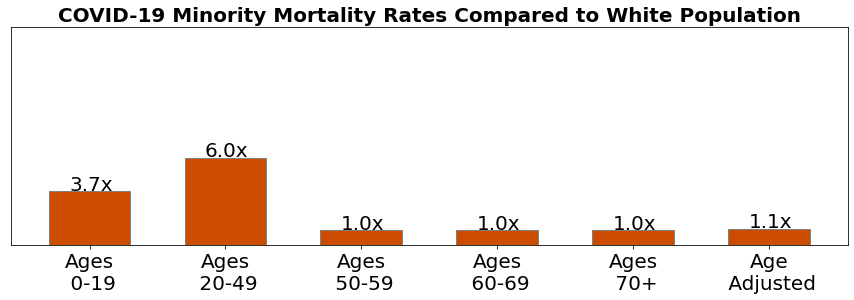

array([3.73037521, 6.03675279, 1.00000004, 1.00000049, 1.00000021,
       1.11653887])

In [92]:
sol_bm_10 = np.loadtxt('worker_bm_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_bm_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_abs_both_deaths_10.txt', deaths)
plotting_fun2(deaths,total_pops)

In [38]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_both_mort_IDIS_10,[d for d in starting_points_bi_10])
out_bi_10 = np.array(output)

print(np.round(out_bi_10[np.argmin(out_bi_10[:,1]),:][0],2))
np.savetxt('worker_bi_10_sol.txt', out_bi_10[np.argmin(out_bi_10[:,1]),:][0])


[0.   0.   0.   0.6  0.   0.82 0.74 0.82]


Total deaths: 166.0
Deaths: [ 0.27315287  2.59958672 11.36860066 55.07742507 75.06858108  0.48191794
  5.47636284  2.36321587  6.75134363  6.46484251]
Inequity in deaths (bars): 7.76672286849827
Inequity in deaths (diff): 1.2036198577593078e-05
Inequity in deaths (ID): 182.09085194279777
YLLs: 687.0095607801767
Inequity in YLLs (diff): 65.36223024507083
Inequity in YLLs (ID): 188.84747037595963


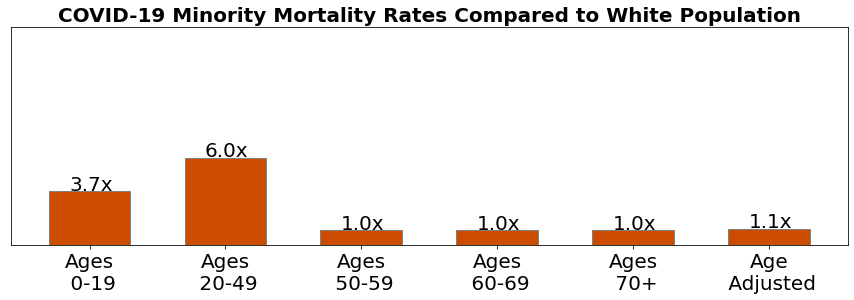

array([3.73036788, 6.03635256, 0.99999947, 0.99999988, 1.00000178,
       1.11652092])

In [93]:
sol_bi_10 = np.loadtxt('worker_bi_10_sol.txt')
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_bi_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_id_both_deaths_10.txt', deaths)
plotting_fun2(deaths,total_pops)

# Base Case

Total deaths: 548.0
Deaths: [  0.34846938   3.60285682  16.27843704  81.94811438 310.47488738
   0.62292706   7.81274124  20.19716117  42.53712627  64.55284859]
Inequity in deaths (bars): 17.610905606183078
Inequity in deaths (diff): 0.0017333431366084156
Inequity in deaths (ID): 501.4446831563004
YLLs: [   3.93298695   13.1243346    94.27432641  252.69388125  256.81985291
   14.86452665   83.67179734  571.59627566 1095.80781408  646.3677184 ]
Inequity in YLLs (diff): 1791.4627499960166
Inequity in YLLs (ID): 514.1133602742734


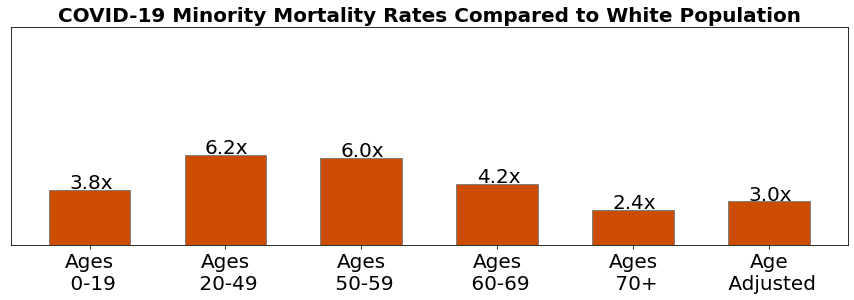

19.58989887375908

In [95]:
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = np.zeros(8)
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",calc_ylls(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('no_vax.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))

In [27]:
sum(0.1*np.ones(8)*total_pops[[1,2,3,4,6,7,8,9]])<0.1*sum(total_pops)

True

Total deaths: 390.0
Deaths: [  0.29608967   2.58923545  11.60239488  58.4611639  220.41268008
   0.52873686   5.62375406  14.42147097  30.42618677  45.97876133]
Inequity in deaths (bars): 17.646934128784803
Inequity in deaths (diff): 0.0012389643149729767
Inequity in deaths (ID): 502.2650074341286
YLLs: [  3.34180525   9.4319575   67.19367218 180.26990028 182.32183787
  12.61692375  60.22849024 408.139492   783.81536642 460.3853696 ]
Inequity in YLLs (diff): 1282.626468931624
Inequity in YLLs (ID): 514.9536557604171


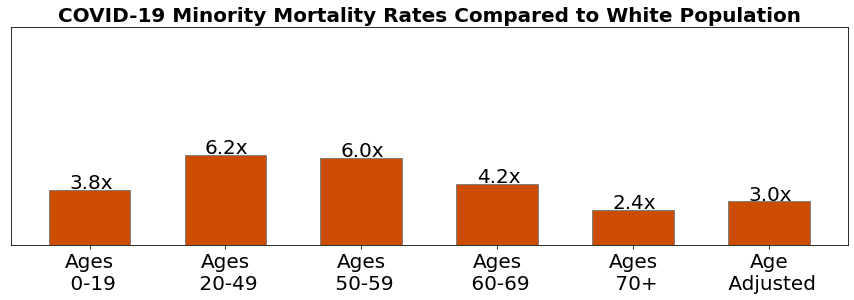

19.637050173983685

In [96]:
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = 0.1*np.ones(8)
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",calc_ylls(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('rand_base.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))

# Working with YLLs

In [5]:
from YLL_funs import *

In [41]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_ylls_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_ylls_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,0,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_ylls_10 = np.append(starting_points_ylls_10,sp_1).reshape(21,8)
starting_points_ylls_10 = np.append(starting_points_ylls_10,sp_2).reshape(22,8)
starting_points_ylls_10 = np.append(starting_points_ylls_10,sp_3).reshape(23,8)
starting_points_ylls_10 = np.append(starting_points_ylls_10,sp_4).reshape(24,8)
np.savetxt('starting_points_ylls_10p.txt', starting_points_ylls_10)

In [42]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_ineq_ylls_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_iy_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,0,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_iy_10 = np.append(starting_points_iy_10,sp_1).reshape(21,8)
starting_points_iy_10 = np.append(starting_points_iy_10,sp_2).reshape(22,8)
starting_points_iy_10 = np.append(starting_points_iy_10,sp_3).reshape(23,8)
starting_points_iy_10 = np.append(starting_points_iy_10,sp_4).reshape(24,8)
np.savetxt('starting_points_ineq_ylls_10p.txt', starting_points_iy_10)


In [43]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_ineq_idis_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_idis_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,0,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_idis_10 = np.append(starting_points_idis_10,sp_1).reshape(21,8)
starting_points_idis_10 = np.append(starting_points_idis_10,sp_2).reshape(22,8)
starting_points_idis_10 = np.append(starting_points_idis_10,sp_3).reshape(23,8)
starting_points_idis_10 = np.append(starting_points_idis_10,sp_4).reshape(24,8)
np.savetxt('starting_points_ineq_yll_idis_10p.txt', starting_points_idis_10)



In [12]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_both_ylls_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_by_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,0,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_by_10 = np.append(starting_points_by_10,sp_1).reshape(21,8)
starting_points_by_10 = np.append(starting_points_by_10,sp_2).reshape(22,8)
starting_points_by_10 = np.append(starting_points_by_10,sp_3).reshape(23,8)
starting_points_by_10 = np.append(starting_points_by_10,sp_4).reshape(24,8)
np.savetxt('starting_points_both_ylls_10p.txt', starting_points_by_10)



In [13]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(sp_both_idis_10,[d for d in ref_dirs_10k_10p])
out = np.array(output)
idx = out.argsort()[:20]
starting_points_byi_10 = ref_dirs_10k_10p[idx]
sp_1 = np.array([0,0,0,0,.6,.7,.7,.7])
sp_2 = np.array([0,0,0,0.7,0,0,0,1])
sp_3 = np.array([0.04, 0.03, 0.06, 0.  , 0.31, 0.77, 0.7 , 0.29])
sp_4 = np.array([0.  , 0.  , 0.  , 0.71 , 0.  , 0.  , 0.54, 1.])
starting_points_byi_10 = np.append(starting_points_byi_10,sp_1).reshape(21,8)
starting_points_byi_10 = np.append(starting_points_byi_10,sp_2).reshape(22,8)
starting_points_byi_10 = np.append(starting_points_byi_10,sp_3).reshape(23,8)
starting_points_byi_10 = np.append(starting_points_byi_10,sp_4).reshape(24,8)
np.savetxt('starting_points_both_ylls_idis_10p.txt', starting_points_byi_10)



In [14]:
starting_points_ylls_10  = np.loadtxt('starting_points_ylls_10p.txt')
starting_points_ineq_ylls_10 =np.loadtxt('starting_points_ineq_ylls_10p.txt')
starting_points_ineq_ylls_idis_10  = np.loadtxt('starting_points_ineq_yll_idis_10p.txt')
starting_points_by_10 = np.loadtxt('starting_points_both_ylls_10p.txt')
starting_points_byi_10 = np.loadtxt('starting_points_both_ylls_idis_10p.txt')

[0.   0.   0.51 0.   0.   1.   1.   1.  ]
225.0
[  0.   2.  10.  24. 183.   0.   5.   0.   0.   0.]


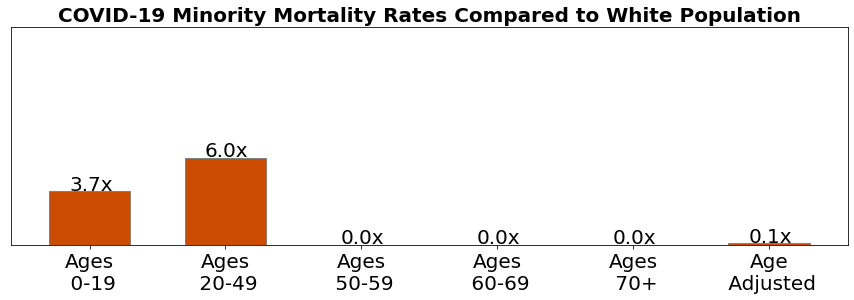

11.646867042634927

In [47]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_ylls_10,[d for d in starting_points_ylls_10])
out_yll_10 = np.array(output)

print(np.round(out_yll_10[np.argmin(out_yll_10[:,1]),:][0],2))
np.savetxt('yll_10_sol.txt', out_yll_10[np.argmin(out_yll_10[:,1]),:][0])

sol_yll_10 = np.loadtxt('yll_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_yll_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print(np.round(sum(deaths)))
print(np.round(deaths))
    
sum(abs(plotting_fun2(deaths,total_pops)-1))

Total deaths: 225.0
Deaths: [2.57907667e-01 2.39846574e+00 1.02630994e+01 2.38537392e+01
 1.82695914e+02 4.54150916e-01 5.03071098e+00 1.37080258e-09
 4.03331502e-09 3.59143009e-08]
Inequity in deaths (bars): 10.733345095416729
Inequity in deaths (diff): 0.0004830317256871319
Inequity in deaths (ID): 352.56972003018706
YLLs: 361.4776867144216
Inequity in YLLs (diff): 337.1818954393333
Inequity in YLLs (ID): 354.7252659322654


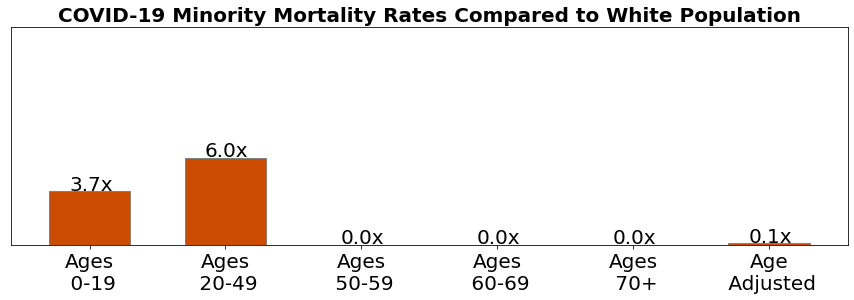

11.646867042634927

In [97]:
sol_yll_10 = np.loadtxt('yll_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_yll_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_ylls_10.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))



[0.   0.   0.   0.   0.68 0.81 0.73 0.53]
317.0
[  0.   3.  11.  57. 217.   0.   2.   2.   7.  18.]


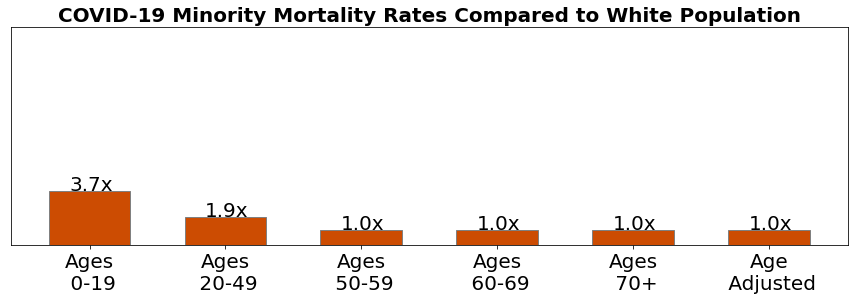

3.6147624150188413

In [49]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_ineq_ylls_10,[d for d in starting_points_ineq_ylls_10 ])
out_iy_10 = np.array(output)

print(np.round(out_iy_10[np.argmin(out_iy_10[:,1]),:][0],2))
np.savetxt('ineq_yll_10_sol.txt', out_iy_10[np.argmin(out_iy_10[:,1]),:][0])

sol_iy_10 = np.loadtxt('ineq_yll_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_iy_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print(np.round(sum(deaths)))
print(np.round(deaths))
    
sum(abs(plotting_fun2(deaths,total_pops)-1))

Total deaths: 317.0
Deaths: [  0.26680065   2.50779135  11.23527742  57.18770369 217.07264364
   0.46084886   1.62743341   2.29914232   6.84529337  17.93257859]
Inequity in deaths (bars): 3.5915240939502966
Inequity in deaths (diff): 2.541469382003734e-05
Inequity in deaths (ID): 110.77910945157517
YLLs: 883.5119542882979
Inequity in YLLs (diff): 16.27989070162355
Inequity in YLLs (ID): 108.52525718731543


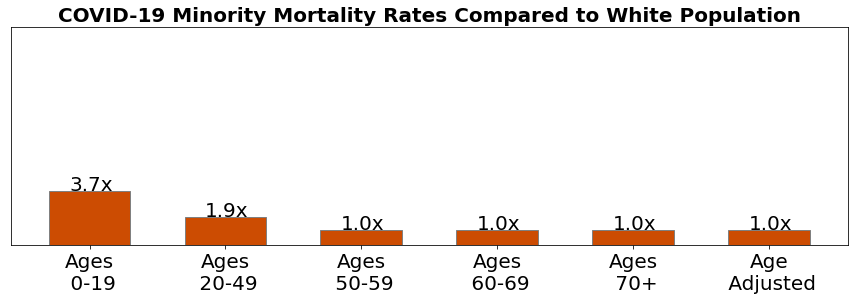

3.6147624150188413

In [98]:
sol_iy_10 = np.loadtxt('ineq_yll_10_sol.txt')
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_iy_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_abs_ineq_ylls_10.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))

[0.05 0.14 0.13 0.12 0.14 0.33 0.43 0.41]
311.0
[  0.   3.  10.  51. 191.   0.   5.   9.  16.  25.]


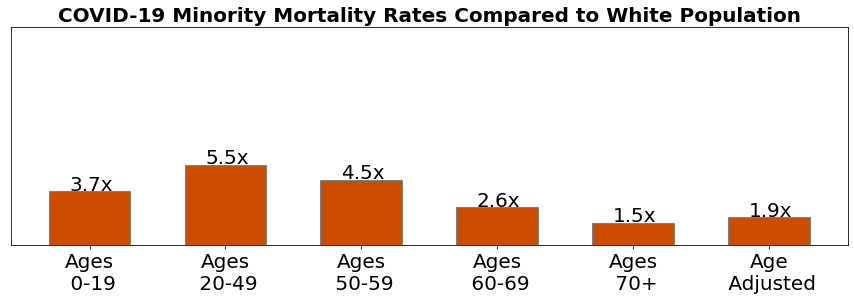

13.943397512874267

In [51]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_ineq_ylls_idis_10,[d for d in starting_points_ineq_ylls_idis_10])
out_iyi_10 = np.array(output)

print(np.round(out_iyi_10[np.argmin(out_iyi_10[:,1]),:][0],2))
np.savetxt('ineq_yll_idis_10_sol.txt', out_iyi_10[np.argmin(out_iyi_10[:,1]),:][0])

sol_iyi_10 = np.loadtxt('ineq_yll_idis_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_iyi_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print(np.round(sum(deaths)))
print(np.round(deaths))
    
sum(abs(plotting_fun2(deaths,total_pops)-1))

Total deaths: 311.0
Deaths: [  0.   3.  10.  51. 191.   0.   5.   9.  16.  25.]
Inequity in deaths (bars): 13.002373510674504
Inequity in deaths (diff): 0.0004955900980656373
Inequity in deaths (ID): 382.2171782430895
YLLs: 1388.7511163748545
Inequity in YLLs (diff): 619.0473752549974
Inequity in YLLs (ID): 392.2637729560061


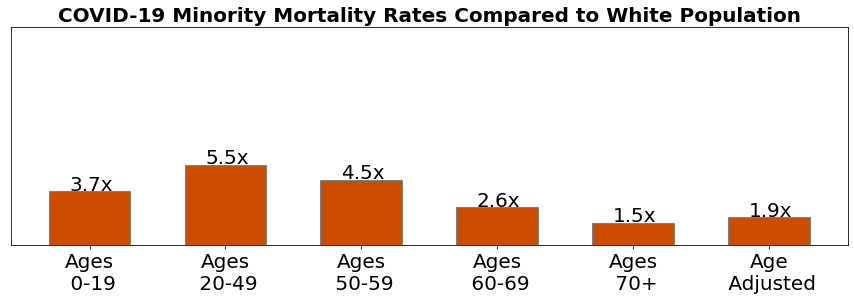

13.943397512874267

In [99]:
sol_iyi_10 = np.loadtxt('ineq_yll_idis_10_sol.txt')
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_iyi_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",np.round(deaths))
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_id_ineq_ylls_10.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))

[0.   0.   0.57 0.   0.   0.82 0.89 0.86]
236.0
[  0.   2.  10.  21. 186.   0.   5.   2.   3.   5.]


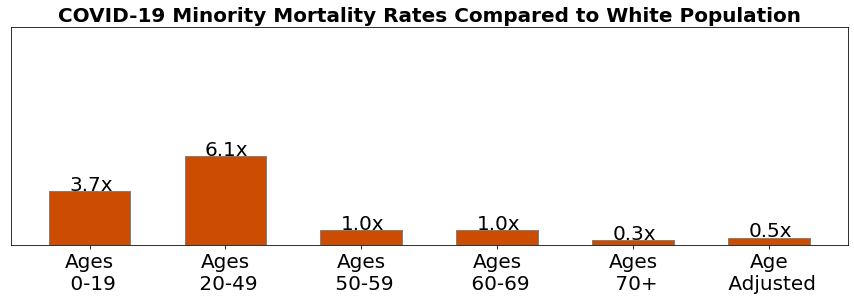

9.044397892146986

In [15]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_both_10,[d for d in starting_points_by_10])
out_by_10 = np.array(output)

print(np.round(out_by_10[np.argmin(out_by_10[:,1]),:][0],2))
np.savetxt('both_yll_10_sol.txt', out_by_10[np.argmin(out_by_10[:,1]),:][0])

sol_by_10 = np.loadtxt('both_yll_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_by_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print(np.round(sum(deaths)))
print(np.round(deaths))
    
sum(abs(plotting_fun2(deaths,total_pops)-1))

In [58]:
np.round(np.loadtxt('both_yll_10_sol.txt'),4)

array([0.    , 0.    , 0.569 , 0.    , 0.    , 0.8207, 0.8918, 0.8596])

Total deaths: 236.0
Deaths: [  0.26168011   2.44728935  10.49691074  21.34368802 186.15058079
   0.46198411   5.16887796   2.14776542   2.55479733   4.75041095]
Inequity in deaths (bars): 8.527710027319767
Inequity in deaths (diff): 0.00029678515936398705
Inequity in deaths (ID): 221.50112399921227
YLLs: 534.0005989880501
Inequity in YLLs (diff): 160.93581809998935
Inequity in YLLs (ID): 221.41402304408723


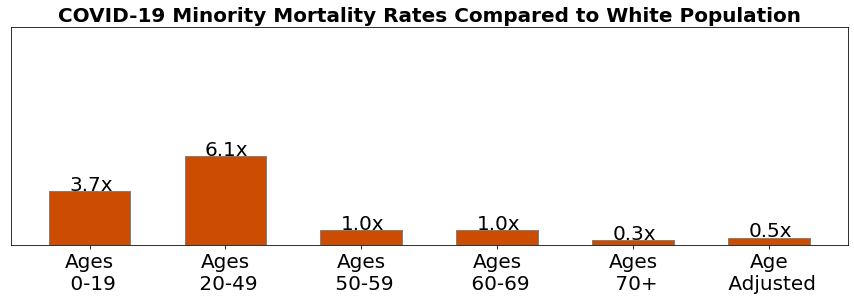

9.044397892146986

In [100]:
sol_by_10 = np.loadtxt('both_yll_10_sol.txt')
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_by_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",deaths)
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))
np.savetxt('min_abs_both_ylls_10.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))

[0.   0.   0.   0.   0.68 0.81 0.73 0.53]
317.0
[  0.   3.  11.  57. 217.   0.   2.   2.   7.  18.]


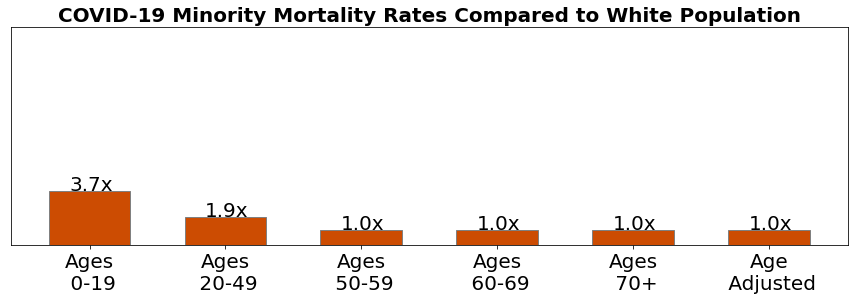

3.612706467166261

In [101]:
if __name__ ==  '__main__': 
    num_processors = 5
    p=Pool(processes = num_processors)
    output = p.map(worker_both_idis_10,[d for d in starting_points_byi_10])
out_byi_10 = np.array(output)

print(np.round(out_byi_10[np.argmin(out_byi_10[:,1]),:][0],2))
np.savetxt('both_yll_idis_10_sol.txt', out_byi_10[np.argmin(out_byi_10[:,1]),:][0])

sol_byi_10 = np.loadtxt('both_yll_idis_10_sol.txt')

y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_byi_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print(np.round(sum(deaths)))
print(np.round(deaths))
np.savetxt('min_id_both_ylls_10.txt', deaths)
sum(abs(plotting_fun2(deaths,total_pops)-1))

Total deaths: 317.0
Deaths: [  0.   3.  11.  57. 217.   0.   2.   2.   7.  18.]
Inequity in deaths (bars): 3.5895615486524215
Inequity in deaths (diff): 2.5339832429847945e-05
Inequity in deaths (ID): 110.7100322987848
YLLs: 883.5018331937354
Inequity in YLLs (diff): 16.30113101453824
Inequity in YLLs (ID): 108.45756927228932


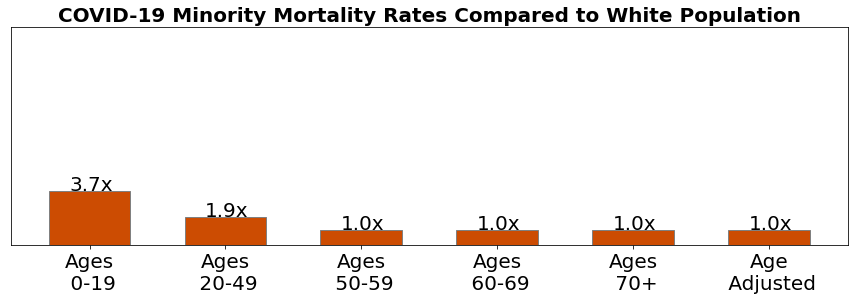

3.612706467166261

In [18]:
sol_byi_10 = np.loadtxt('both_yll_idis_10_sol.txt')
y0_new=y0_use.copy()
y0_new = y0_new.reshape(21,10)
y0_new[18] = np.zeros(10)
y0_new=y0_new.reshape(210)
p = sol_byi_10
y0_new=vaccinate_sus_y0(p,y0_new)
t = np.linspace(0,4*4*7,300)
sol=scipy.integrate.solve_ivp(lambda t,y:coronavirusEqs_with_vaccination_only(t,y, params),[0,4*4*7], y0_new, t_eval=t)
sol_plot=np.reshape(sol.y,(21,10,300))
deaths = sol_plot[18,:,-1]-deaths_from_curr_inf 
print("Total deaths:",np.round(sum(deaths)))
print("Deaths:",np.round(deaths))
print("Inequity in deaths (bars):", calc_death_bars(deaths,total_pops))
print("Inequity in deaths (diff):",calc_mort_diff(deaths,total_pops))
print("Inequity in deaths (ID):",calc_mort_idis(deaths,total_pops,total_pops_age))
print("YLLs:",sum(calc_ylls(deaths,two_pop_daly,total_pops),1))
print("Inequity in YLLs (diff):",calc_yll_diff(deaths,two_pop_daly,total_pops))
print("Inequity in YLLs (ID):",calc_index_idis(deaths,two_pop_daly,total_pops))

sum(abs(plotting_fun2(deaths,total_pops)-1))